# Problem statement

## What is tfidfVectorizer?

## What is passiveAggressive classifier?

In [12]:
#Step-1. Make necessary imports
import numpy as np 
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [13]:
#Step-2. reading data into DataFrame (df) getting shape of the top five data
df=pd.read_csv("/home/kushal/Desktop/news.csv")
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [14]:
#Step-3. get the labels from the DataFrame
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [15]:
#Step-4. Split the dataset into training and testing sets.
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [16]:
#Step-5.  let’s initialize a TfidfVectorizer with stop words from the English language and a maximum document 
# frequency  of 0.7.
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)
#   Stop words are the most common words in a language that are to be filtered out before processing the natural 
#   language data. And a TfidfVectorizer turns a collection of raw documents into a matrix of TF-IDF features.

In [17]:
#Step-6. Next, we’ll initialize a PassiveAggressiveClassifier. This is. We’ll fit this on tfidf_train and y_train.
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
        
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')
#Then, we’ll predict on the test set from the TfidfVectorizer and calculate the accuracy with accuracy_score() 
#from sklearn.metrics.

Accuracy: 92.82%


In [18]:
#Step-7. We got an accuracy of 92.82% with this model. Finally, let’s print out a confusion matrix to gain 
#insight into the number of false and true negatives and positives.
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[590,  48],
       [ 43, 586]])

In [19]:
#So with this model, we have 589 true positives, 586 true negatives, 43 false positives, and 49 false negatives.

In [23]:
Data = {'News': [589, 586, 43, 49]}
df = DataFrame(Data,columns=['News'],index = ['true positive','true negative','false positive','false negative'])

print (df)

                News
true positive    589
true negative    586
false positive    43
false negative    49


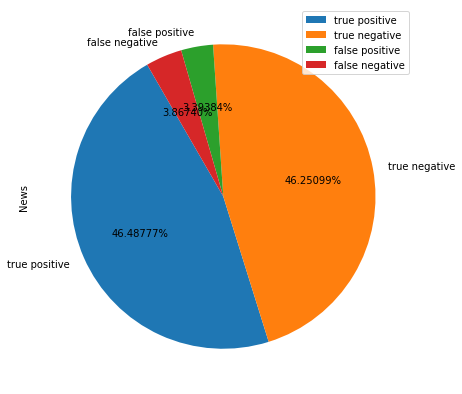

In [21]:
df.plot.pie(y='News',figsize=(7, 7),autopct='%1.5f%%', startangle=120)


In [22]:
#So with the piechart, we have 46.5% true positive, 46.2% true negative, 3.3% false positive, and 3.8 false negative.